In [1]:
# Run this code cell to import relevant libraries
# Please update to seaborn v0.11 or above for this assignment
# check version: print(sns.__version__)

import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
import statsmodels.api as sm

In [2]:
# Run but do not modify this code

insurance = pd.read_csv("insurance.csv")
print(insurance.shape)
insurance.head()

(1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# summary table for smoker status
charges_by_smoker = insurance.groupby('smoker')['charges'].mean().to_frame()
charges_by_smoker.head()

,charges
smoker,
no,8434.268298
yes,32050.231832


In [4]:
# summary table for sex
charges_by_sex = insurance.groupby('sex')['charges'].mean().to_frame()
charges_by_sex.head()

,charges
sex,
female,12569.578844
male,13956.751178


In [5]:
# summary table for region
charges_by_region = insurance.groupby('region')['charges'].mean().to_frame()
charges_by_region.head()

,charges
region,
northeast,13406.384516
northwest,12417.575374
southeast,14735.411438
southwest,12346.937377


In [6]:
# summary table for bmi
under = insurance[insurance['bmi'] < 18.5]
under.insert(0, 'BMI Class', 'Underweight')

healthy = insurance[(insurance['bmi'] >= 18.5) & (insurance['bmi'] < 25.0)] 
healthy.insert(0, 'BMI Class', 'Healthy Weight')

over = insurance[(insurance['bmi'] >= 25.0) & (insurance['bmi'] < 30.0)] 
over.insert(0, 'BMI Class', 'Overweight')

obese = insurance[insurance['bmi'] >= 30.0]
obese.insert(0, 'BMI Class', 'Obese')

frames = [under, healthy, over, obese]
bmi = pd.concat(frames)

In [7]:
# summary table for bmi
charges_by_bmi = bmi.groupby('BMI Class')['charges'].mean().to_frame()
charges_by_bmi.head()

,charges
BMI Class,
Healthy Weight,10409.337709
Obese,15552.335469
Overweight,10987.509891
Underweight,8852.200585


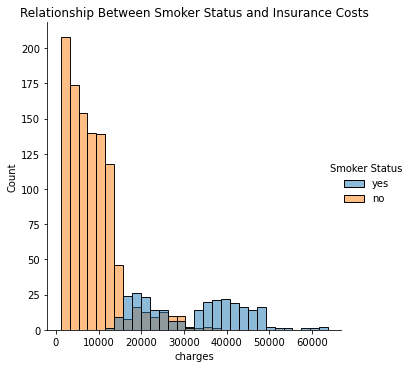

In [8]:
# visualization on smoker status and insurance cost
(sns.displot(data = insurance, x = 'charges', hue = 'smoker')
    .set(title = 'Relationship Between Smoker Status and Insurance Costs')
    ._legend.set_title('Smoker Status'))

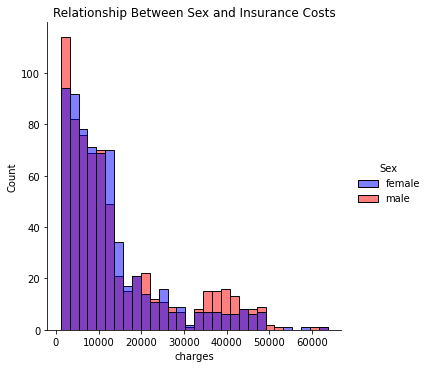

In [9]:
# visualization on sex and insurance costs
(sns.displot(data = insurance, x = 'charges', hue = 'sex', palette=["blue", "red"])
    .set(title = 'Relationship Between Sex and Insurance Costs')
    ._legend.set_title('Sex'))

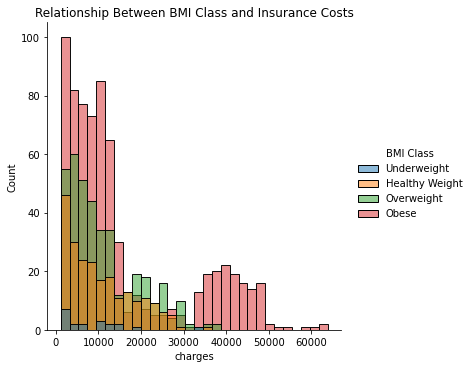

In [10]:
# visualization on bmi class and insurance costs
(sns.displot(data = bmi, x = 'charges', hue = 'BMI Class')
    .set(title = 'Relationship Between BMI Class and Insurance Costs')
    ._legend.set_title('BMI Class'))

In [11]:
# sex hypothesis test and confidence interval
males = insurance[insurance['sex'] == 'male']
females = insurance[insurance['sex'] == 'female']
male_prop = males['charges'].mean()
female_prop = females['charges'].mean()
male_std = males['charges'].std()
female_std = females['charges'].std()
p_val1 = stats.ttest_ind_from_stats(mean1=male_prop, std1=male_std, nobs1=males.shape[0], mean2=female_prop, std2=female_std, nobs2=females.shape[0])[1]
print("P-Value is : %5.3f" % (p_val1))
male_ci = list(stats.norm.interval(alpha=0.95, loc=male_prop, scale = (male_std / males.shape[0])))
female_ci = list(stats.norm.interval(alpha=0.95, loc=female_prop, scale = (female_std / females.shape[0])))
print("Male confidence interval ranges from %5.3f to %5.3f" % (male_ci[0], male_ci[1]))
print("Female confidence interval ranges from %5.3f to %5.3f" % (female_ci[0], female_ci[1]))

P-Value is : 0.036
Male confidence interval ranges from 13919.144 to 13994.359
Female confidence interval ranges from 12536.630 to 12602.527


In [12]:
# smoker status hypothesis test and confidence interval
smokers = insurance[insurance['smoker'] == 'yes']
nonsmokers = insurance[insurance['smoker'] == 'no']
smokers_prop = smokers['charges'].mean()
nonsmokers_prop = nonsmokers['charges'].mean()
smokers_std = smokers['charges'].std()
nonsmokers_std = nonsmokers['charges'].std()
p_val2 = stats.ttest_ind_from_stats(mean1=smokers_prop, std1=smokers_std, nobs1=smokers.shape[0], mean2=nonsmokers_prop, std2=nonsmokers_std, nobs2=nonsmokers.shape[0])[1]
print("P-Value is : %5.3f" % (p_val2))
smokers_ci = list(stats.norm.interval(alpha=0.95, loc=smokers_prop, scale = (smokers_std / smokers.shape[0])))
nonsmokers_ci = list(stats.norm.interval(alpha=0.95, loc=nonsmokers_prop, scale = (nonsmokers_std / nonsmokers.shape[0])))
print("Smokers confidence interval ranges from %5.3f to %5.3f" % (smokers_ci[0], smokers_ci[1]))
print("Nonmokers confidence interval ranges from %5.3f to %5.3f" % (nonsmokers_ci[0], nonsmokers_ci[1]))

P-Value is : 0.000
Smokers confidence interval ranges from 31967.673 to 32132.790
Nonmokers confidence interval ranges from 8423.227 to 8445.309


In [13]:
# bmi class hypothesis test and confidence interval
under_prop = under['charges'].mean()
healthy_prop = healthy['charges'].mean()
over_prop = over['charges'].mean()
obese_prop = obese['charges'].mean()

under_std = under['charges'].std()
healthy_std = healthy['charges'].std()
over_std = over['charges'].std()
obese_std = obese['charges'].std()

under_ci = list(stats.norm.interval(alpha=0.95, loc=under_prop, scale = (under_std / under.shape[0])))
healthy_ci = list(stats.norm.interval(alpha=0.95, loc=healthy_prop, scale = (healthy_std / healthy.shape[0])))
over_ci = list(stats.norm.interval(alpha=0.95, loc=over_prop, scale = (over_std / over.shape[0])))
obese_ci = list(stats.norm.interval(alpha=0.95, loc=obese_prop, scale = (obese_std / obese.shape[0])))
print("Underweight class confidence interval ranges from %5.3f to %5.3f" % (under_ci[0], under_ci[1]))
print("Healthy weight class confidence interval ranges from %5.3f to %5.3f" % (healthy_ci[0], healthy_ci[1]))
print("Overweight class confidence interval ranges from %5.3f to %5.3f" % (over_ci[0], over_ci[1]))
print("Obese class confidence interval ranges from %5.3f to %5.3f" % (obese_ci[0], obese_ci[1]))

Underweight class confidence interval ranges from 8094.181 to 9610.220
Healthy weight class confidence interval ranges from 10343.957 to 10474.718
Overweight class confidence interval ranges from 10946.689 to 11028.331
Obese class confidence interval ranges from 15511.993 to 15592.678


In [14]:
# multiple linear regression model

# make variables categorical
insurance['sex'].replace(['female', 'male'],
                        [0, 1], inplace=True)
insurance['region'].replace(['southwest', 'southeast', 'northwest', 'northeast'],
                        [0, 1, 2, 3], inplace=True)
insurance['smoker'].replace(['no', 'yes'],
                        [0, 1], inplace=True)

# set data and target
data = insurance[['age', 'sex', 'bmi', 'children', 'smoker', 'region']].values
target = insurance['charges'].values

# fit model and predict data
linear_model = LinearRegression()
linear_model.fit(X = data, y = target)
insurance['predicted_charges'] = linear_model.predict(data)
predictions = insurance['predicted_charges'].values

# create baseline model
average = np.mean(insurance['charges'])
baseline = np.full(predictions.shape, average)

# calculate model accuracy
m1_mse = mean_squared_error(target, predictions) # float: MSE of your model
m1_r2 = r2_score(target, predictions) # float: R^2 score of your model
base_mse = mean_squared_error(target, baseline)
base_r2 = r2_score(target, baseline)

# Leave these lines here to print the result
print("Model MSE:", m1_mse, "r^2:", m1_r2)
print("Baseline MSE:", base_mse, "r^2:", base_r2)

Model MSE: 36527659.88568238 r^2: 0.7507372027994937
Baseline MSE: 146542766.49354792 r^2: 0.0


In [15]:
# age model
data = insurance['age'].values.reshape((-1, 1))
target = insurance['charges'].values
linear_model2 = LinearRegression()
linear_model2.fit(X = data, y = target)
insurance['predicted_charges'] = linear_model2.predict(data)
predictions = insurance['predicted_charges'].values
m2_mse = mean_squared_error(target, predictions) # float: MSE of your model
m2_r2 = r2_score(target, predictions) # float: R^2 score of your model
print("Model MSE:", m2_mse, "r^2:", m2_r2)

Model MSE: 133440978.61376347 r^2: 0.08940589967885804


In [16]:
# sex model
data = insurance['sex'].values.reshape((-1, 1))
target = insurance['charges'].values
print(data)
linear_model3 = LinearRegression()
linear_model3.fit(X = data, y = target)
insurance['predicted_charges'] = linear_model3.predict(data)
predictions = insurance['predicted_charges'].values
m3_mse = mean_squared_error(target, predictions) # float: MSE of your model
m3_r2 = r2_score(target, predictions) # float: R^2 score of your model
print("Model MSE:", m3_mse, "r^2:", m3_r2)

[[0]
 [1]
 [1]
 ...
 [0]
 [0]
 [0]]
Model MSE: 146061757.39031374 r^2: 0.003282380391360862


In [17]:
# bmi model
data = insurance['bmi'].values.reshape((-1, 1))
target = insurance['charges'].values
linear_model4 = LinearRegression()
linear_model4.fit(X = data, y = target)
insurance['predicted_charges'] = linear_model4.predict(data)
predictions = insurance['predicted_charges'].values
m4_mse = mean_squared_error(target, predictions) # float: MSE of your model
m4_r2 = r2_score(target, predictions) # float: R^2 score of your model
print("Model MSE:", m4_mse, "r^2:", m4_r2)

Model MSE: 140777900.09850758 r^2: 0.03933913991786253


In [18]:
# number of children model
data = insurance['children'].values.reshape((-1, 1))
target = insurance['charges'].values
linear_model5 = LinearRegression()
linear_model5.fit(X = data, y = target)
insurance['predicted_charges'] = linear_model5.predict(data)
predictions = insurance['predicted_charges'].values
m5_mse = mean_squared_error(target, predictions) # float: MSE of your model
m5_r2 = r2_score(target, predictions) # float: R^2 score of your model
print("Model MSE:", m5_mse, "r^2:", m5_r2)

Model MSE: 145865188.07941642 r^2: 0.004623758854459203


In [19]:
# smoker status model
data = insurance['smoker'].values.reshape((-1, 1))
target = insurance['charges'].values
linear_model6 = LinearRegression()
linear_model6.fit(X = data, y = target)
insurance['predicted_charges'] = linear_model6.predict(data)
predictions = insurance['predicted_charges'].values
m6_mse = mean_squared_error(target, predictions) # float: MSE of your model
m6_r2 = r2_score(target, predictions) # float: R^2 score of your model
print("Model MSE:", m6_mse, "r^2:", m6_r2)

Model MSE: 55720715.95418544 r^2: 0.6197648148218988


In [20]:
# region model
data = insurance['region'].values.reshape((-1, 1))
target = insurance['charges'].values
linear_model7 = LinearRegression()
linear_model7.fit(X = data, y = target)
insurance['predicted_charges'] = linear_model7.predict(data)
predictions = insurance['predicted_charges'].values
m7_mse = mean_squared_error(target, predictions) # float: MSE of your model
m7_r2 = r2_score(target, predictions) # float: R^2 score of your model
print("Model MSE:", m7_mse, "r^2:", m7_r2)

Model MSE: 146537118.41576278 r^2: 3.854218069099247e-05
